## Send a GET request to get data of stations

In [20]:
import requests
headers = {
  'Accept': 'application/json'
}

r = requests.get('https://api.voltaapi.com/v1/stations', params={

}, headers = headers)

print (r.json()[100])

{'id': '535bcd75-2913-459f-a6fc-3e8271f97bbf', 'lin': '002-0191-039-02', 'name': 'UCSF 3rd Street Garage 02', 'status': 'active', 'location': {'type': 'Point', 'coordinates': [-122.389643, 37.768054]}, 'street_address': '1650 3rd St.', 'city': 'San Francisco', 'state': 'CA', 'zip_code': 94158, 'pay_to_park': False, 'completion_date': '2017-01-11T00:00:00.000Z', 'meters': [{'oem_id': '000010003405', 'oem': 'ekm', 'position': 'left'}]}


## Display all of the stations on a map

In [2]:
lons = [] # Coordinate of Longtitude
lats = [] # Coordinate of Latitude
for i in r.json():
    x,y = i['location']['coordinates']
    lons.append(x)
    lats.append(y)

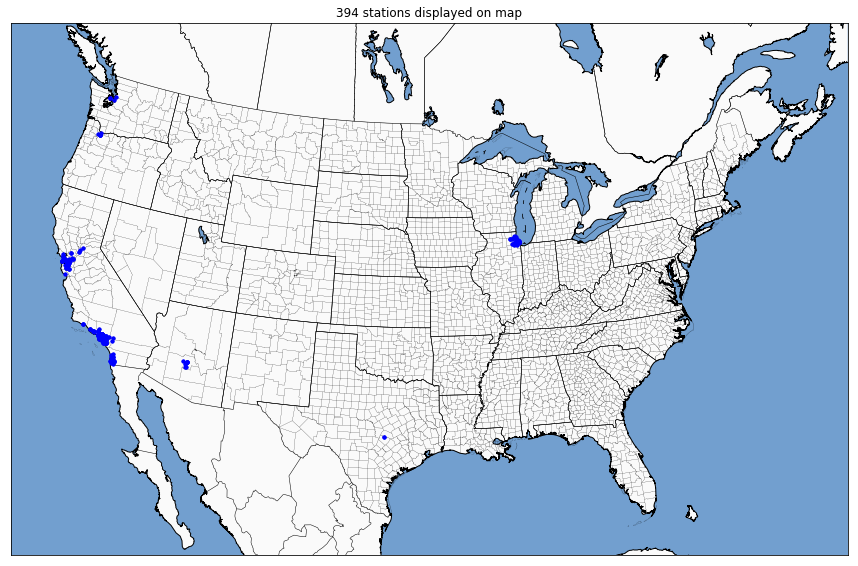

In [3]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

KM = 1000.
clat = 39.3
clon = -94.7333
wid = 5500 * KM
hgt = 3500 * KM

def draw_map_background(m, ax):
    ax.set_facecolor('#729FCF')
    m.fillcontinents(color='#FAFAFA', ax=ax, zorder=0)
    m.drawcounties(ax=ax)
    m.drawstates(ax=ax)
    m.drawcountries(ax=ax)
    m.drawcoastlines(ax=ax)

# Create figure and axes instances
fig = plt.figure(figsize = (15,30))
ax = fig.add_subplot(111)

# Initialize map
m = Basemap(width=wid, height=hgt, rsphere=(6378137.00,6356752.3142),
            resolution='i', area_thresh=2500., projection='lcc',
            lat_1=38.5, lat_2=38.5, lat_0=clat, lon_0=clon)

x,y = m(lons, lats) # Compute map proj coordinates.
m.plot(x, y, 'bo', markersize=3)

draw_map_background(m, ax)

# Add title and show graph
plt.title(str(len(lons))+' stations displayed on map')
plt.show()

## Implement a search by name function

In [27]:
def find(serchByName):
    for i in r.json():
        name = i['name']
        if (name == serchByName):
            print('Find one result: ' + name)
            return(i)

UCSF 3rd Street Garage 02
Find one result: UCSF 3rd Street Garage 02


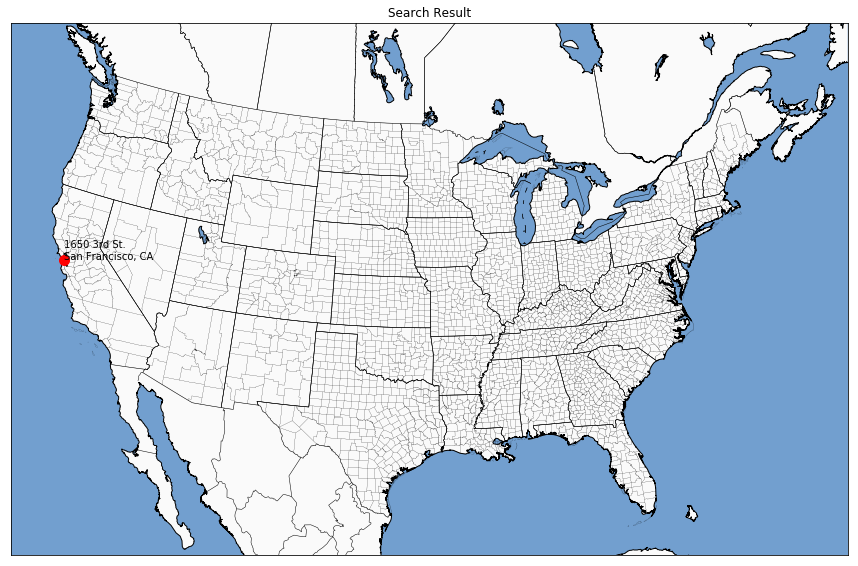

In [29]:
search = input()
result = find(search)
if result == None:
    raise Exception('Error: Not Found') 
lon,lat = result['location']['coordinates']
address = result['street_address']
location = result['city'] + ', '+result['state']


fig2 = plt.figure(figsize = (15,30))
ax2 = fig2.add_subplot(111)

KM = 1000.
clat = 39.3
clon = -94.7333
wid = 5500 * KM
hgt = 3500 * KM

m2 = Basemap(width=wid, height=hgt, rsphere=(6378137.00,6356752.3142),
            resolution='i', area_thresh=2500., projection='lcc',
            lat_1=38.5, lat_2=38.5, lat_0=clat, lon_0=clon)

x,y = m2(lon, lat)
m2.plot(x, y,'ro', markersize=10)

draw_map_background(m2, ax2)

#Add labels
label = address +'\n'+ location
plt.text(x,y,label)
# Add title and show graph
plt.title('Search Result')
plt.show()